**Цель лабораторной работы:** изучение ансамблей моделей машинного обучения

**Задание**
    
    1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
    2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
    3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
    4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.


Для лабораторной работы будем использовать набор данных о медицинской страховке.

Колонки:

 - `age` - возраст
 - `sex` - пол
 - `bmi` - индекс массы тела
 - `children` - кол-во детей
 - `smoker` - курит/не курит
 - `region` - регион проживания в США
 - `charges` - плата за мед. обслуживание

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
# Таблица данных
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Размер набора данных
data.shape

(1338, 7)

In [4]:
# Типы данных в колонках
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Подготовка к анализу данных

### Проверка на пропущенные значения

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропущенных значений нет

### Основные статистические показатели для каждого параметра

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Преообразование категориальных признаков в числовые

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
    # "sex" - пол
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
    # "smoker" - курение
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
    # "region" - регион
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [9]:
data. head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<AxesSubplot:>

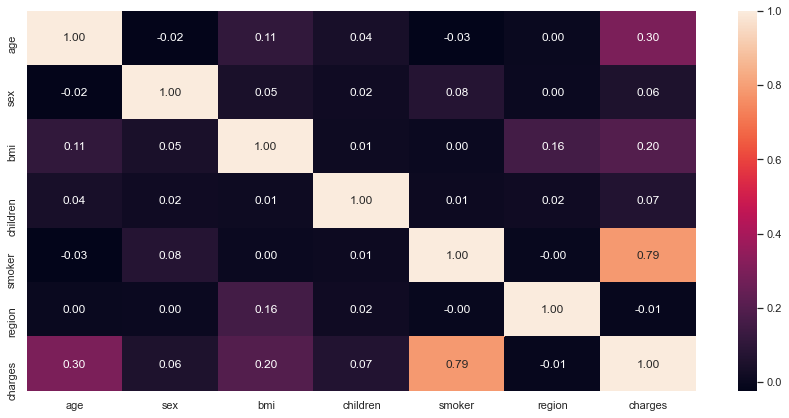

In [11]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

## 1. Тестовая и обучающая выборки

Подключим необходимый метод train_test_split из библиотек sklearn для разделения выборки на тестовую и обучающую

In [12]:
from sklearn.model_selection import train_test_split

### 1.1. Разделение выборки на входные и выходные данные

Задача регрессии будет состоять в предсказании платы за медицинское обслуживание на основании других параметров, в связи с этим следующее распределение входных и выходных параметров:

In [13]:
X = data.drop(['charges'], axis = 1)
Y = data.charges
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1 

Выходные данные:

 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


### 1.2. Разделим выборку на обучающую и тестовую

Размер тестовой выборки определим: 10%

In [14]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      age  sex    bmi  children  smoker  region
461   42    1  30.00         0       1       3
322   34    1  30.80         0       1       3
224   42    1  24.64         0       1       2
711   50    0  23.54         2       0       2
58    53    0  22.88         1       1       2 

Входные параметры тестовой выборки:

       age  sex     bmi  children  smoker  region
578    52    1  30.200         1       0       3
610    47    0  29.370         1       0       2
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1 

Выходные параметры обучающей выборки:

 461    22144.0320
322    35491.6400
224    19515.5416
711    10107.2206
58     23244.7902
Name: charges, dtype: float64 

Выходные параметры тестовой выборки:

 578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64


Проверим:

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1204, 6)
(134, 6)
(1204,)
(134,)


## 1. Случайный лес

### 1.1. Построение случайного леса

Построим случайный лес из 5 деревьев

Подключим необходимый класс RandomForestRegressor из библиотек sklearn для построения случайного леса

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [18]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 1310.9760416268655
Средняя квадратичная ошибка: 7351158.620276929
Median absolute error: 174.6405249999998
Коэффициент детерминации: 0.962088561207213


**Построим график по полученным значениям**

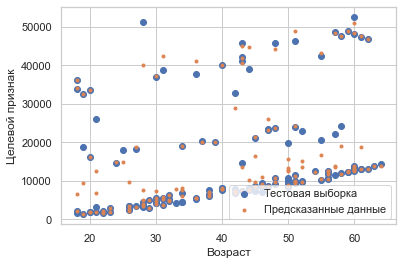

In [19]:
plt.scatter(X_test.age, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.age, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

### 1.2. Нахождение лучшего случайного леса

In [20]:
params2 = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0]
}

In [21]:
grid_2 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
                      param_grid=params2, 
                      scoring='neg_mean_squared_error', 
                      cv=3, 
                      n_jobs=-1)
grid_2.fit(X, Y)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(oob_score=True, random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [22]:
print('Лучший показатель средней квадратичной ошибки:', -grid_2.best_score_)
print('Параметры для данного показателя:\n',            grid_2.best_params_)

Лучший показатель средней квадратичной ошибки: 23041071.51714245
Параметры для данного показателя:
 {'max_features': 0.6, 'n_estimators': 100}


In [23]:
forest_3 = RandomForestRegressor(n_estimators=100, max_features = 0.6, oob_score=True, random_state=10)
forest_3.fit(X, Y)

RandomForestRegressor(max_features=0.6, oob_score=True, random_state=10)

In [24]:
Y_predict3 = forest_3.predict(X_test)

In [25]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict3))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict3))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict3))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict3))

Средняя абсолютная ошибка: 899.0815367718155
Средняя квадратичная ошибка: 2272857.6990717975
Median absolute error: 543.9210286500045
Коэффициент детерминации: 0.9882784048074548


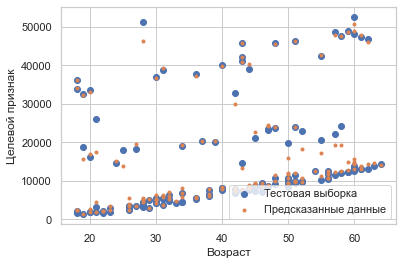

In [26]:
plt.scatter (X_test.age, Y_test,     marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.age, Y_predict3, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show ()

    Показатели точности стали сильно лучше
    На графике видно хорошее совпадение тестовой выборки и предсказанных данных, хотя при возрасте от 50 до 60 заметно расхождение в данных.

## 2. Градиентный бустинг

Построим ансамбль из 5 моделей

Подключим необходимый класс GradientBoostingRegressor из библиотек sklearn для построения ансамбля

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
grad = GradientBoostingRegressor(n_estimators=5, random_state = 10)
grad.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=5, random_state=10)

In [29]:
Y_grad_pred = grad.predict(X_test)

In [30]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred))

Средняя абсолютная ошибка: 6727.197262322547
Средняя квадратичная ошибка: 81404004.45060879
Median absolute error: 5047.509739741814
Коэффициент детерминации: 0.5801827859210638


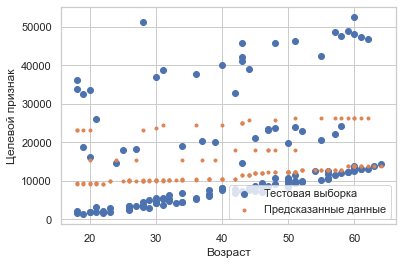

In [31]:
plt.scatter (X_test.age, Y_test,      marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.age, Y_grad_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show ()

Без подбора гиперпараметров ансамбль работает очень плохо

Для улучшения применим кросс-валидацию.

In [32]:
params = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
    'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1]
}

In [33]:
grid_gr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=10),
                       param_grid=params,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       n_jobs=-1)
grid_gr.fit(X, Y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [34]:
print('Лучший показатель средней квадратичной ошибки:', -grid_gr.best_score_)
print('Параметры для данного показателя:\n',            grid_gr.best_params_)

Лучший показатель средней квадратичной ошибки: 20349467.277887657
Параметры для данного показателя:
 {'max_features': 1.0, 'min_samples_leaf': 0.04, 'n_estimators': 50}


In [35]:
grad1 = GradientBoostingRegressor(n_estimators=50, max_features = 1.0, min_samples_leaf = 0.04, random_state = 10)
grad1.fit(X_train, Y_train)
Y_grad_pred1 = grad1.predict(X_test)

Оценим полученный ансамбль

In [36]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred1))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred1))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred1))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred1))

Средняя абсолютная ошибка: 2320.9297076232533
Средняя квадратичная ошибка: 14354148.990339013
Median absolute error: 1602.8507813116812
Коэффициент детерминации: 0.925972697777363


Построим график для визуального сравнения

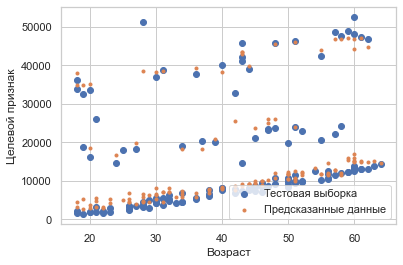

In [37]:
plt.scatter (X_test.age, Y_test,       marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.age, Y_grad_pred1, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show()